In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
dataset = pd.read_csv("Breast_cancer_dataset.csv")

In [3]:
dataset.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
dataset.shape

(569, 33)

In [5]:
dataset["Unnamed: 32"].isnull().sum()

569

In [6]:
dataset.drop(columns = "Unnamed: 32", inplace = True)

In [7]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [10]:
num_columns = []

for feature in dataset.columns:
    if dataset[feature].dtypes != 'O':
        num_columns.append(feature)

print(num_columns)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [11]:
print(len(num_columns))

31


In [12]:
Label = LabelEncoder()

In [13]:
dataset['diagnosis'] = Label.fit_transform(dataset['diagnosis'])

In [14]:
dataset['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [15]:
target = dataset['diagnosis']

In [16]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [17]:
plt.figure(figsize = (10,10))


<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

id
8670         Axes(0.125,0.11;0.775x0.77)
8913         Axes(0.125,0.11;0.775x0.77)
8915         Axes(0.125,0.11;0.775x0.77)
9047         Axes(0.125,0.11;0.775x0.77)
85715        Axes(0.125,0.11;0.775x0.77)
                        ...             
911157302    Axes(0.125,0.11;0.775x0.77)
911296201    Axes(0.125,0.11;0.775x0.77)
911296202    Axes(0.125,0.11;0.775x0.77)
911320501    Axes(0.125,0.11;0.775x0.77)
911320502    Axes(0.125,0.11;0.775x0.77)
Name: diagnosis, Length: 569, dtype: object

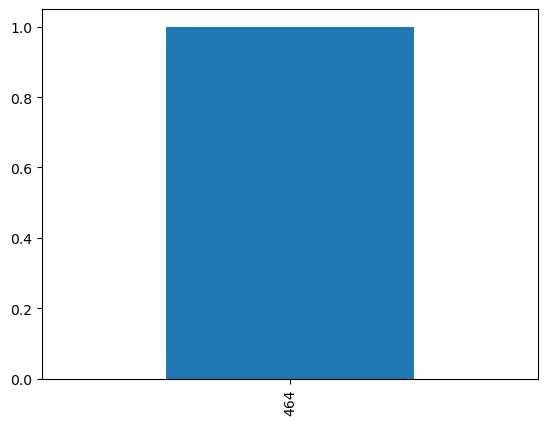

In [18]:
dataset.groupby('id')['diagnosis'].plot.bar()


In [19]:
dataset.drop(columns = 'id', inplace =True)

In [20]:
num_columns.remove('id')

In [21]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
discrete_feature = []
continuous_feature = []
for feature in num_columns:
    if dataset[feature].nunique() < 15:
        discrete_feature.append(feature)
    else:
        continuous_feature.append(feature)
print(discrete_feature)
print(continuous_feature)

[]
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [23]:
len(continuous_feature)

30

In [24]:
dataset.shape

(569, 31)

In [25]:
dataset.groupby('diagnosis').count()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,357
1,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,212


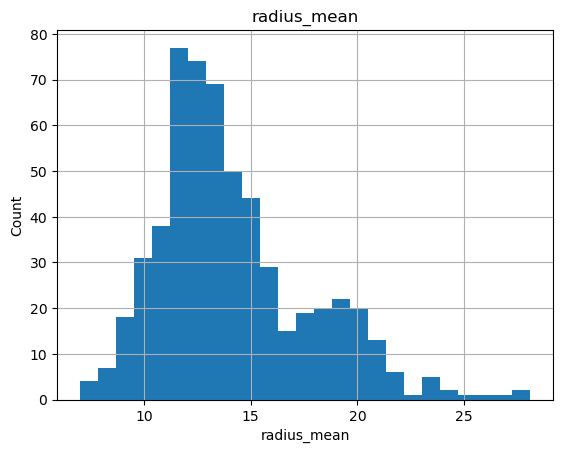

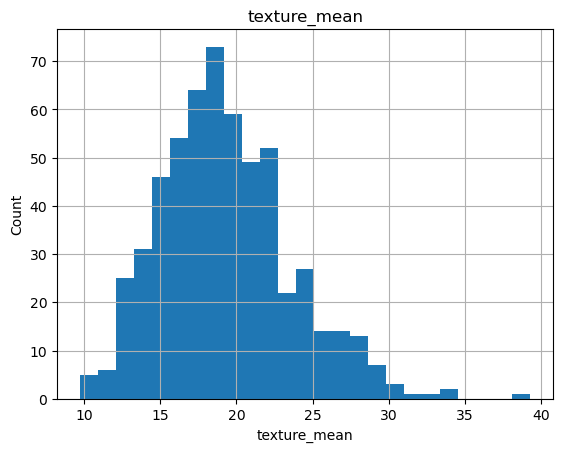

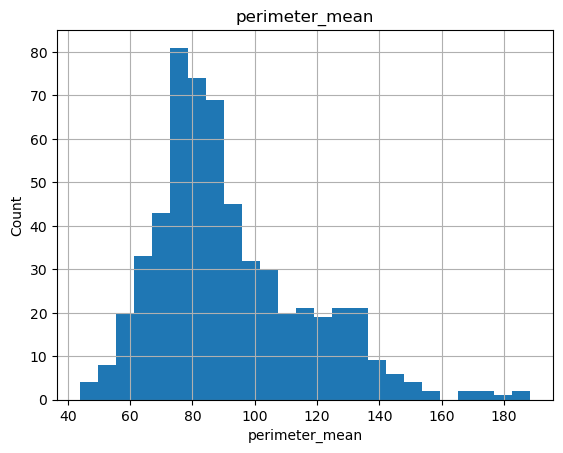

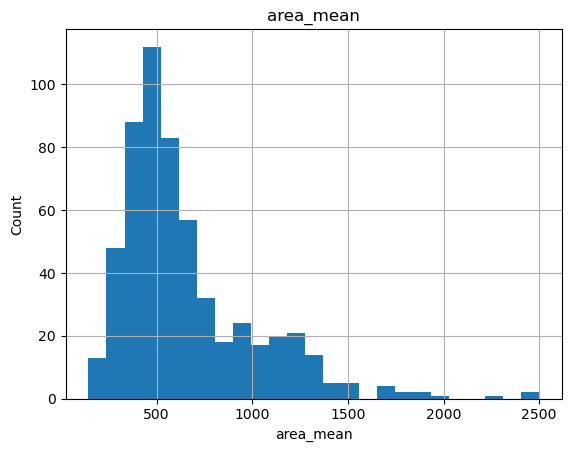

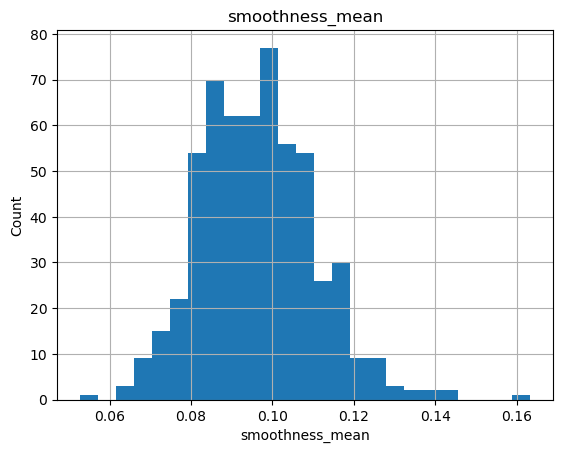

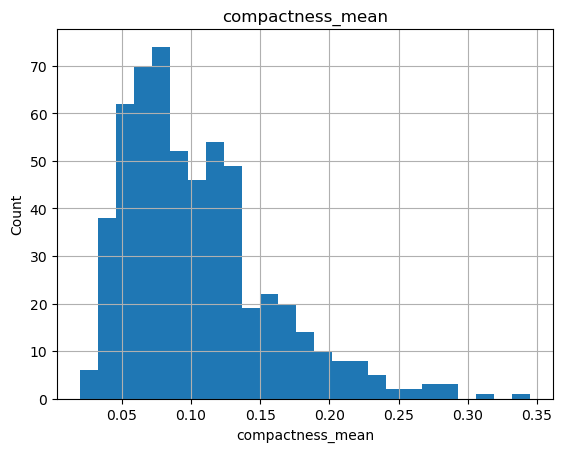

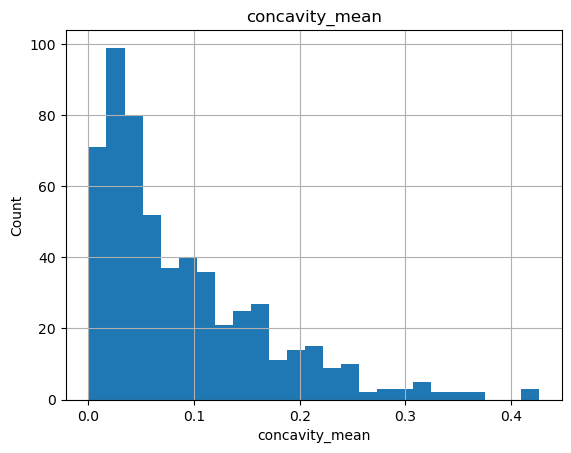

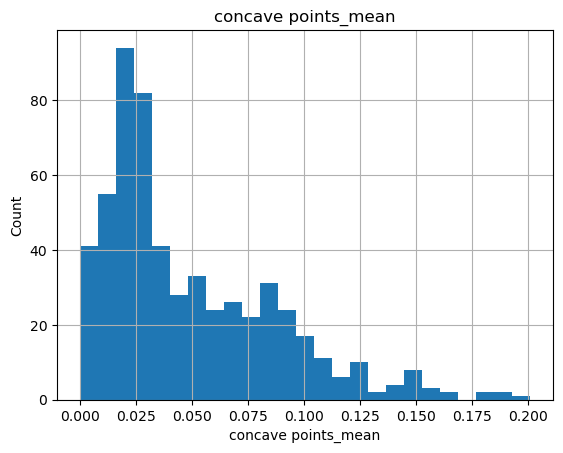

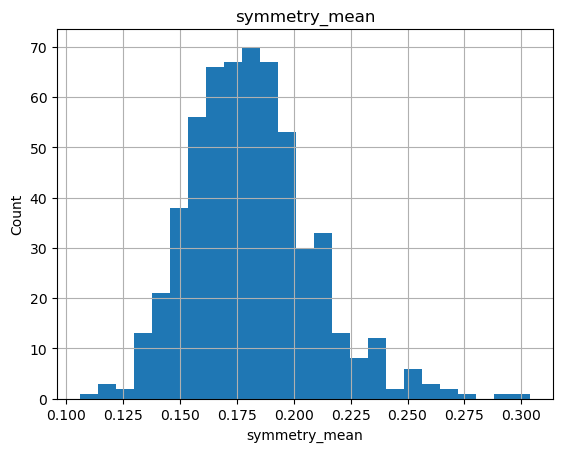

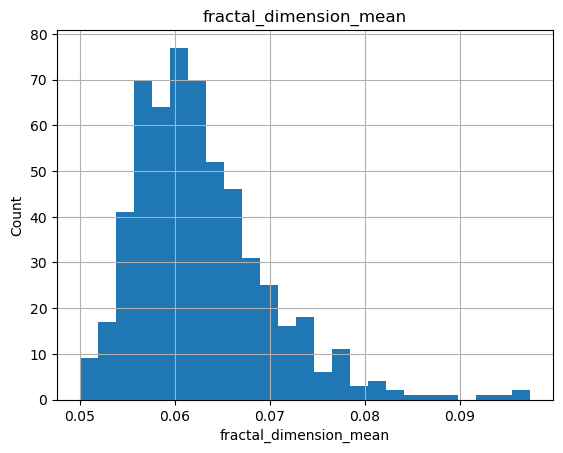

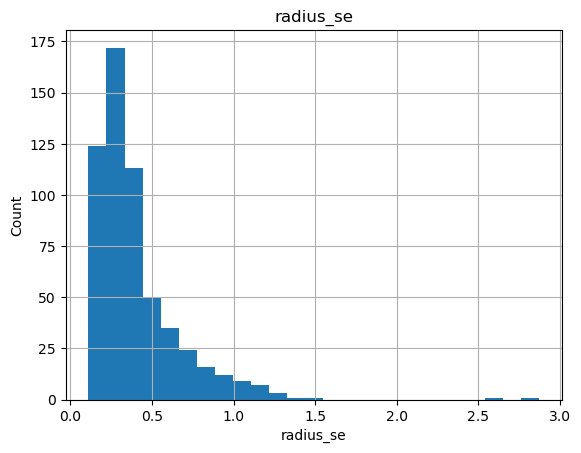

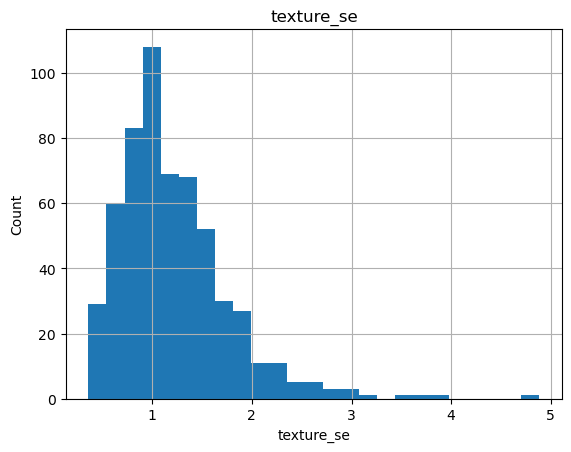

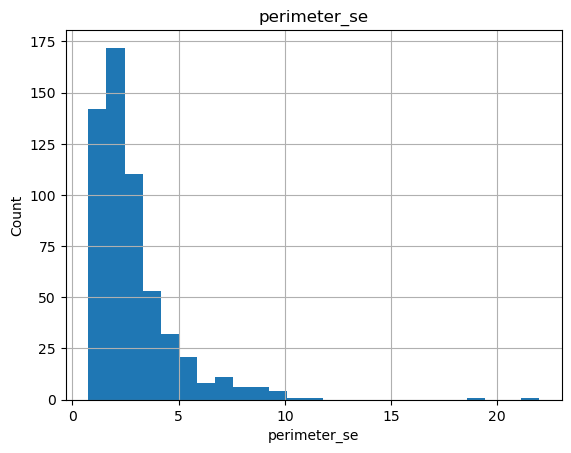

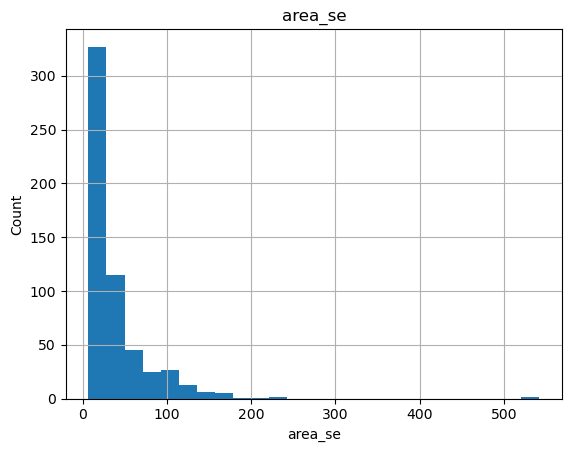

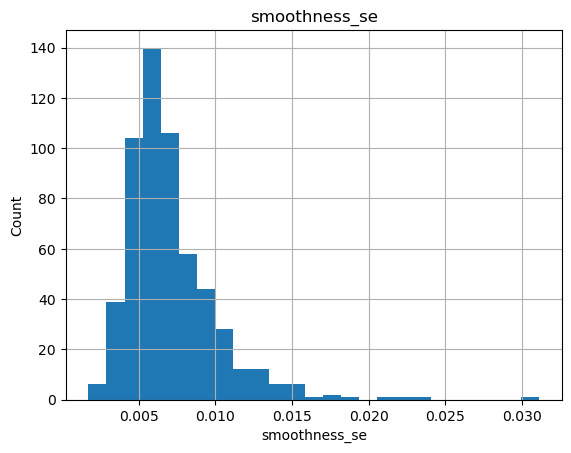

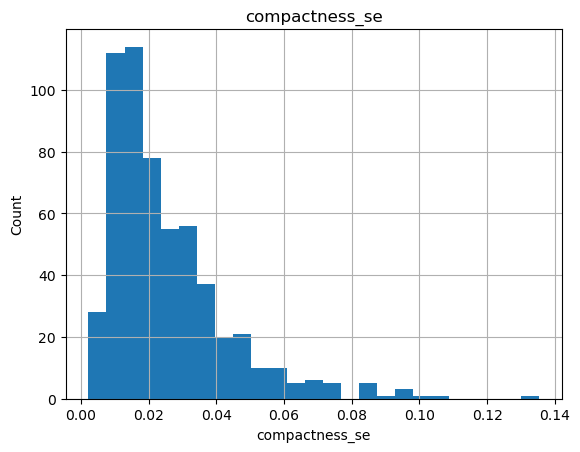

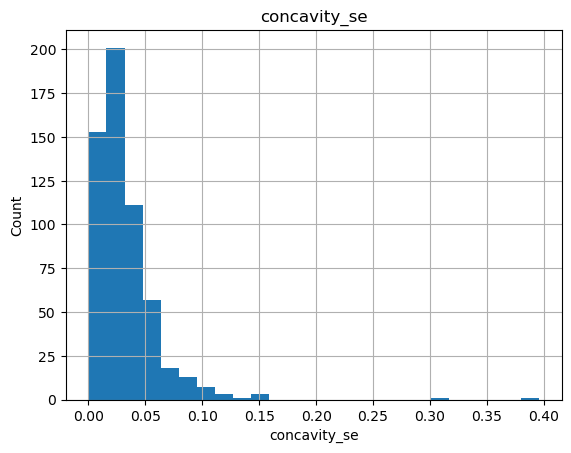

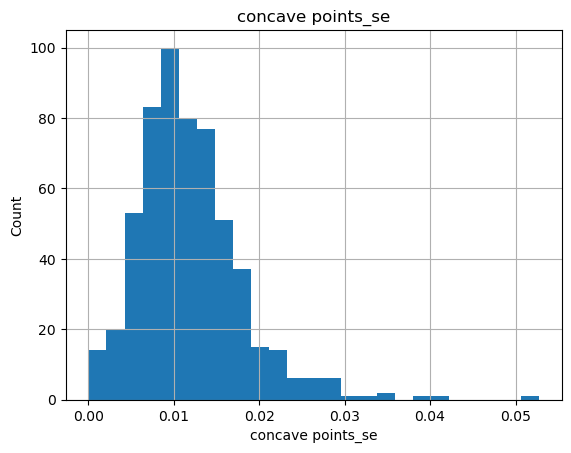

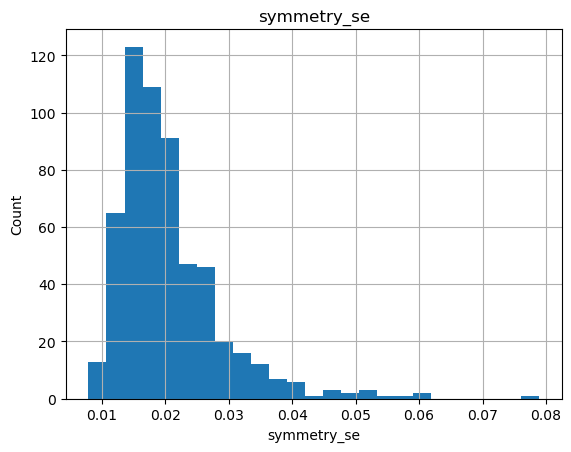

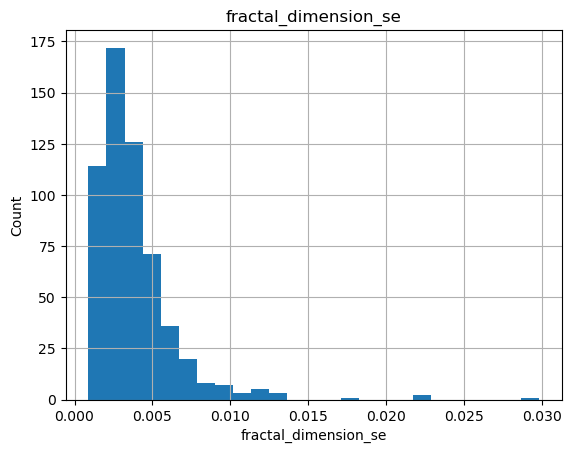

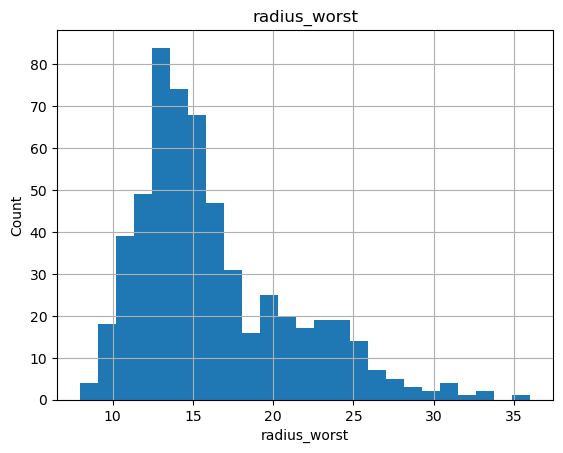

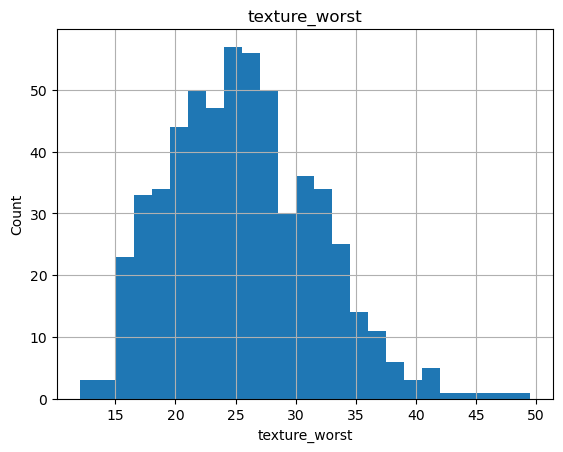

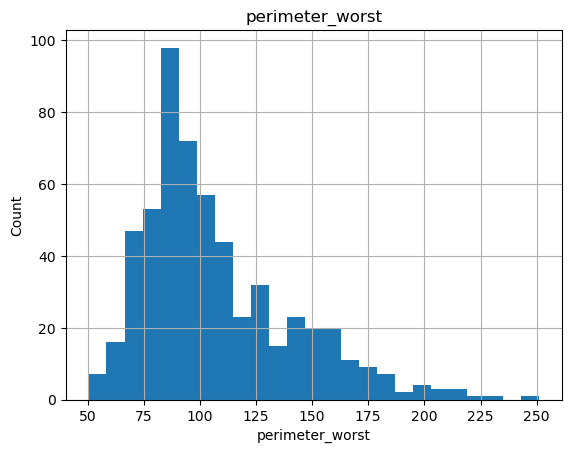

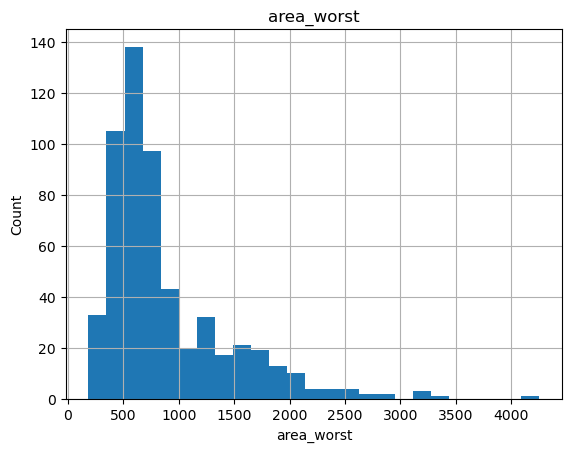

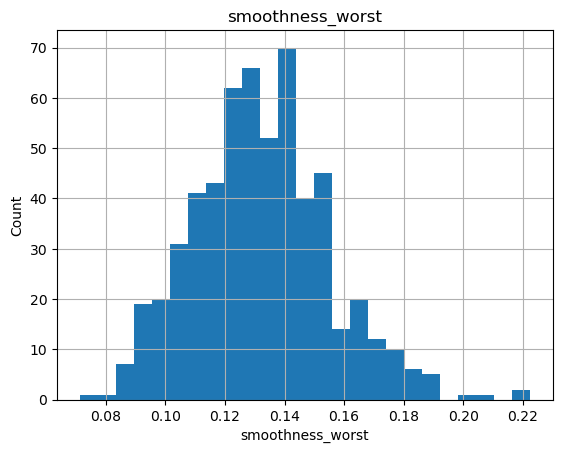

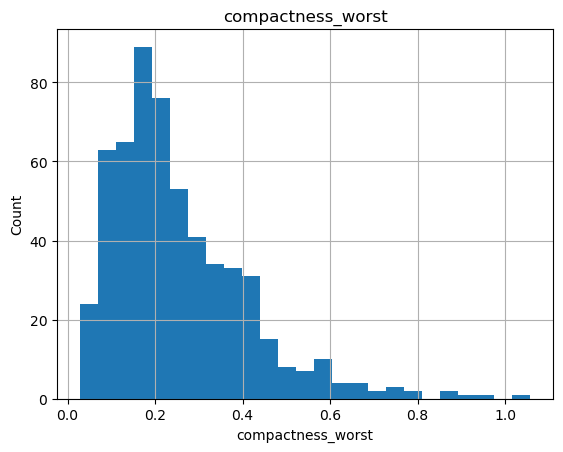

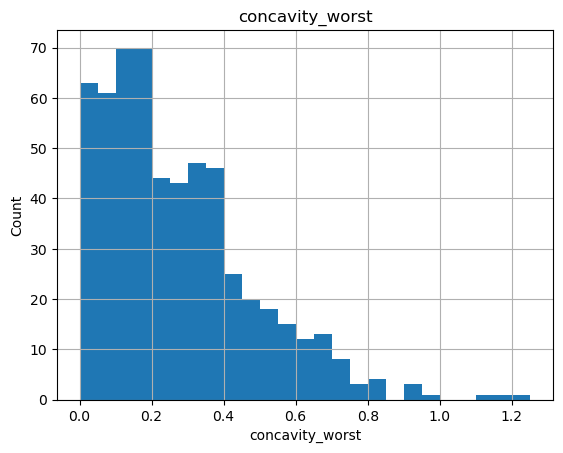

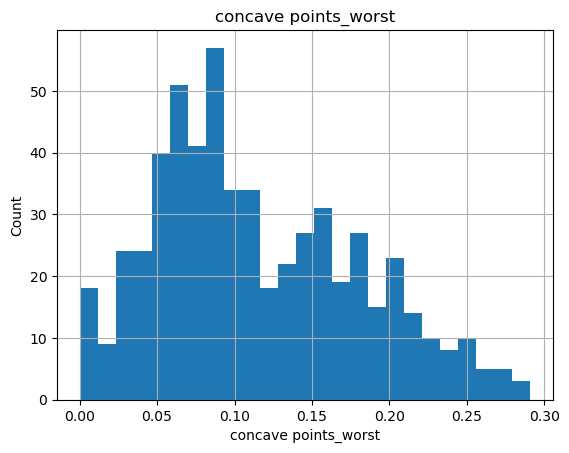

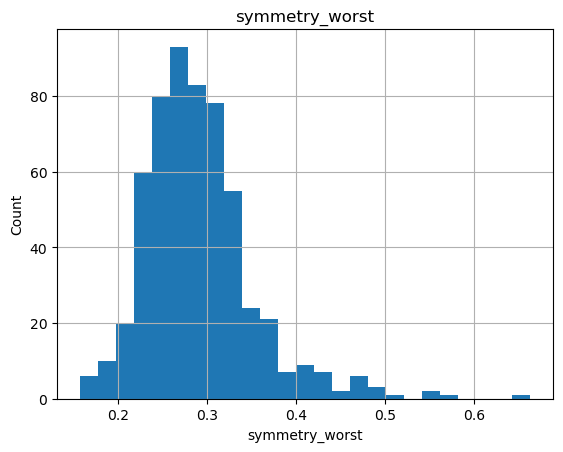

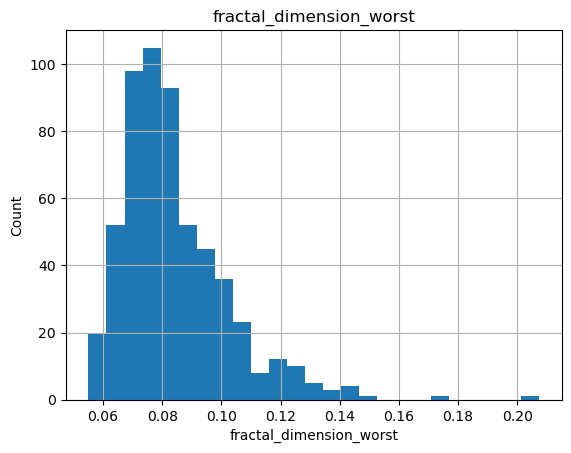

In [26]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


In [27]:
import seaborn as sns

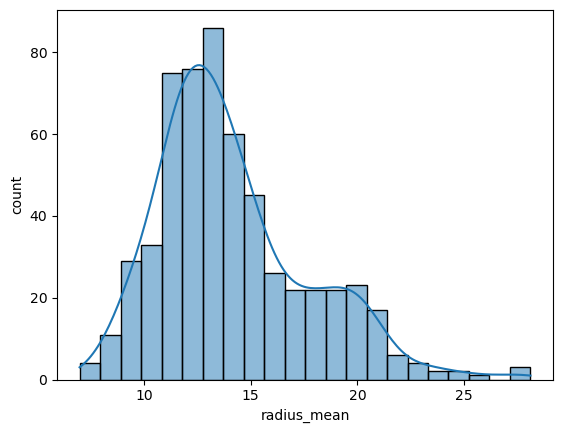

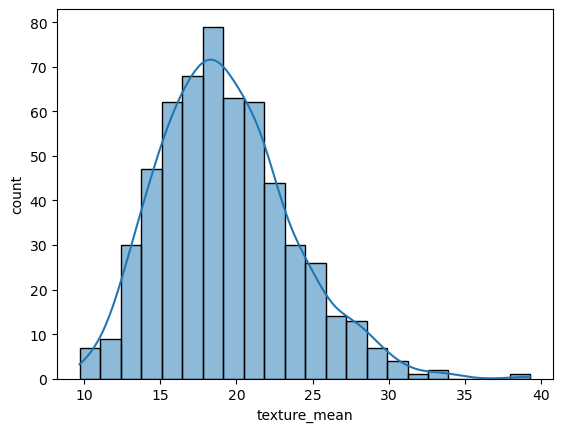

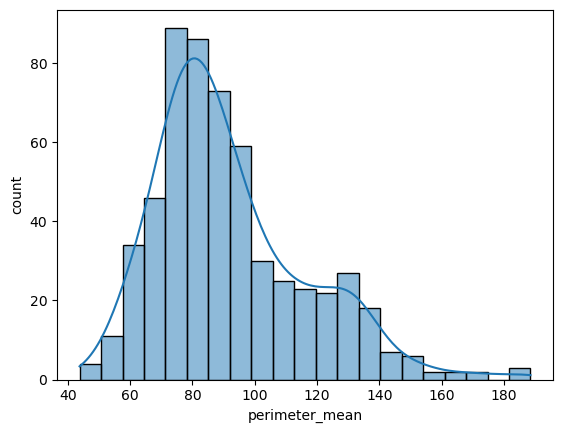

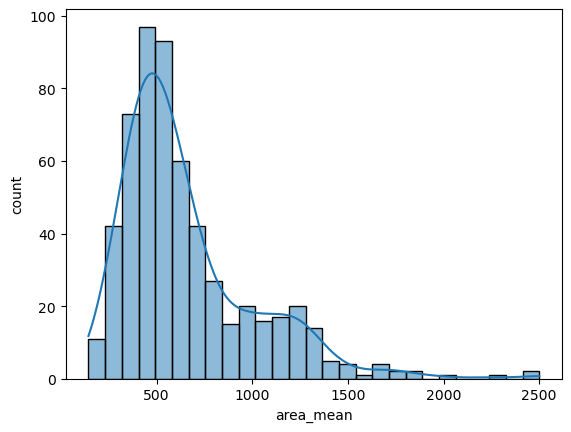

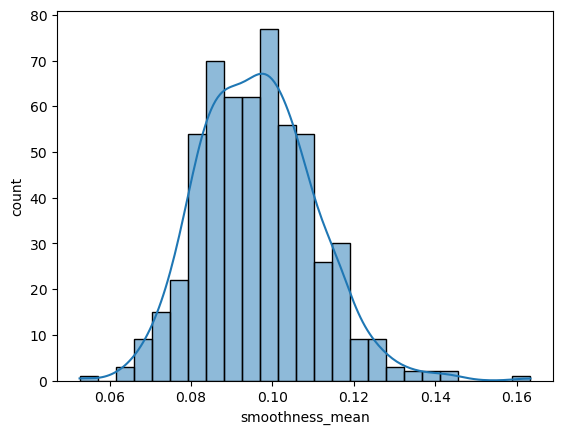

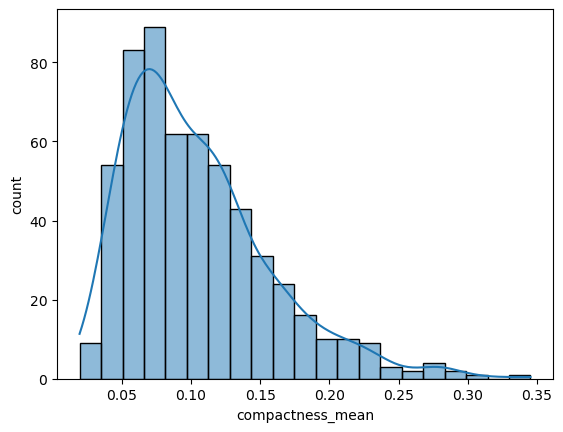

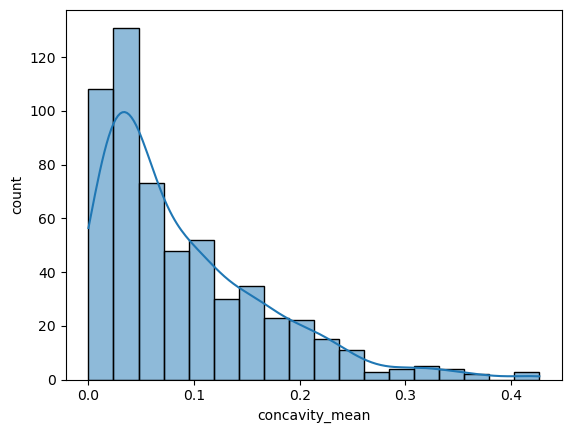

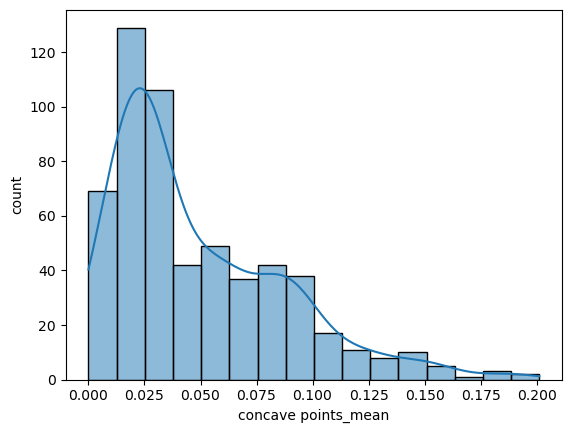

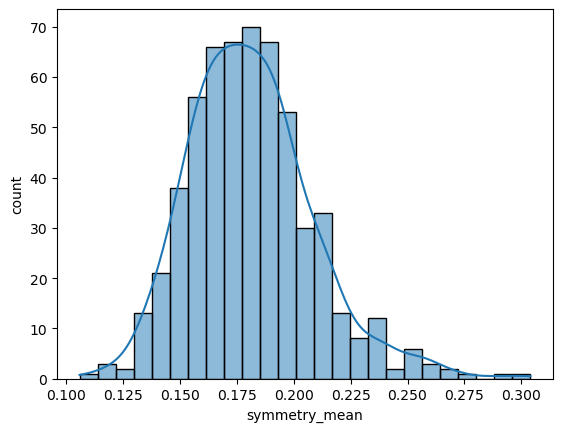

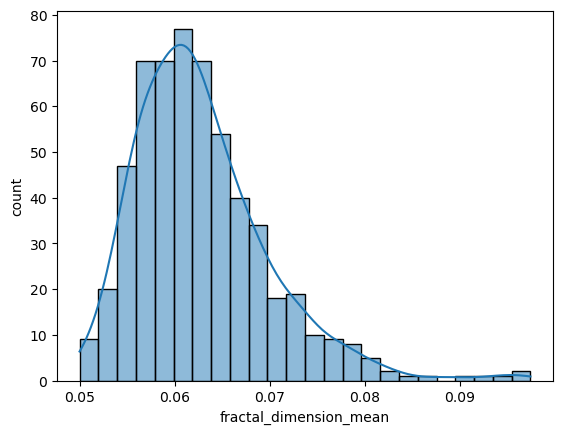

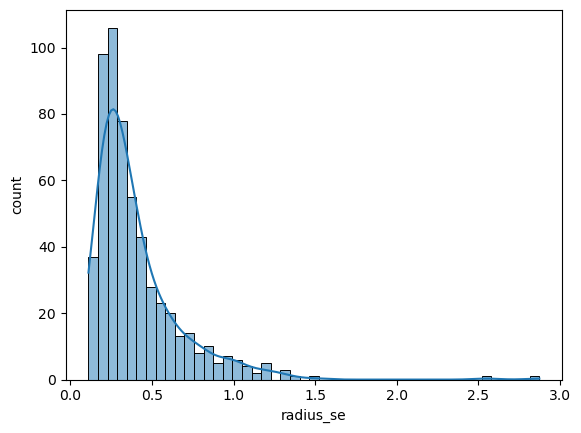

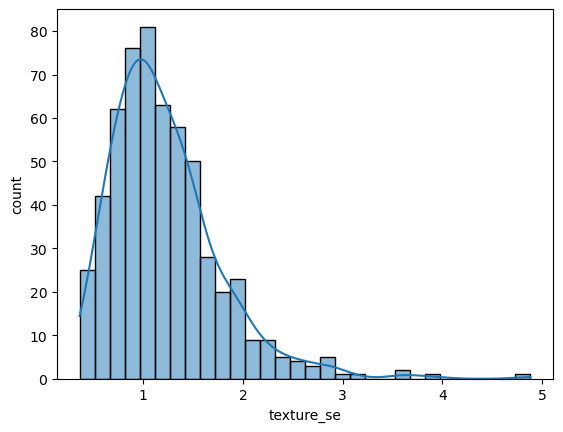

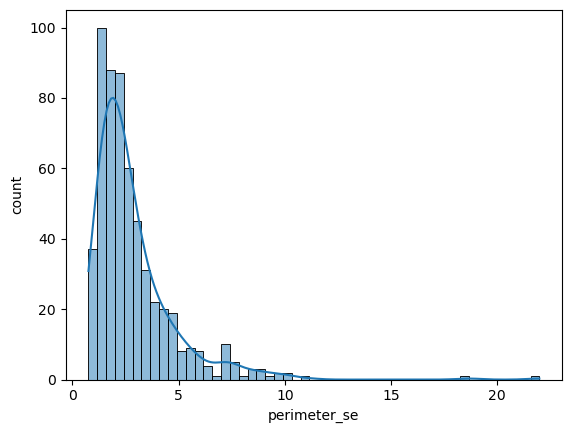

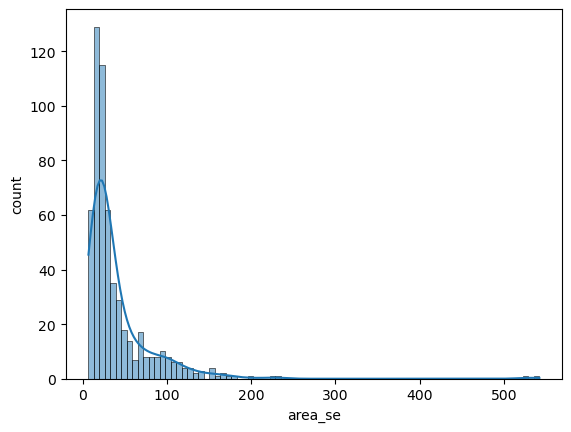

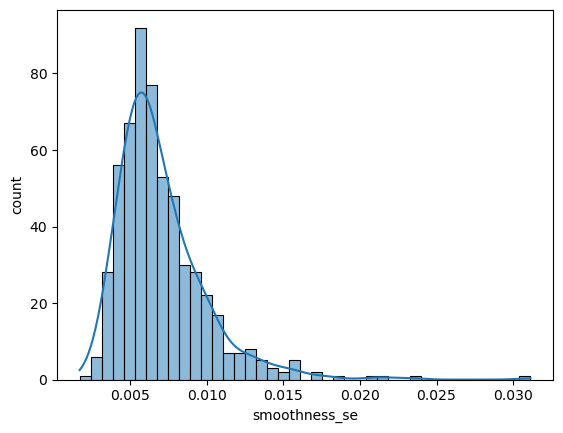

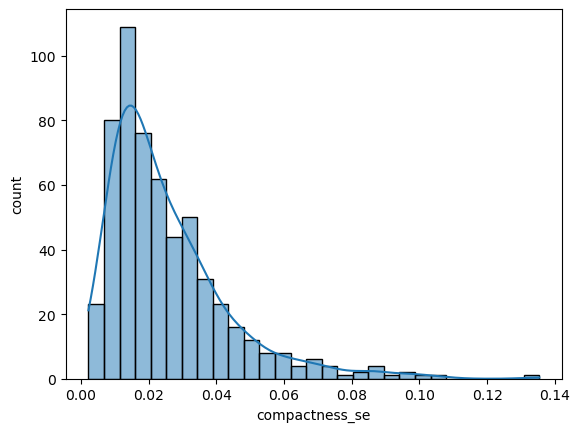

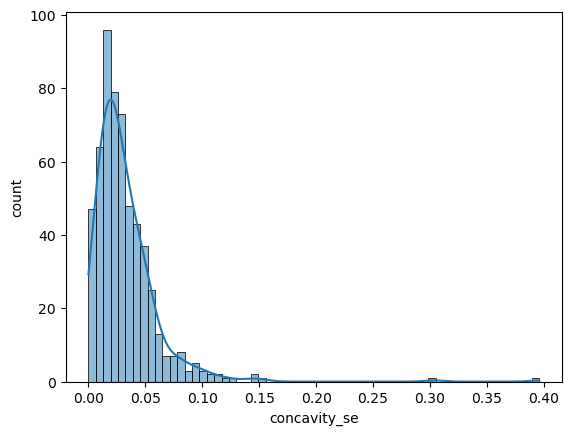

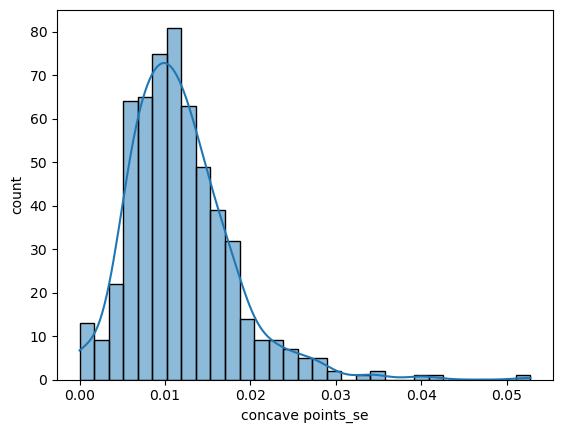

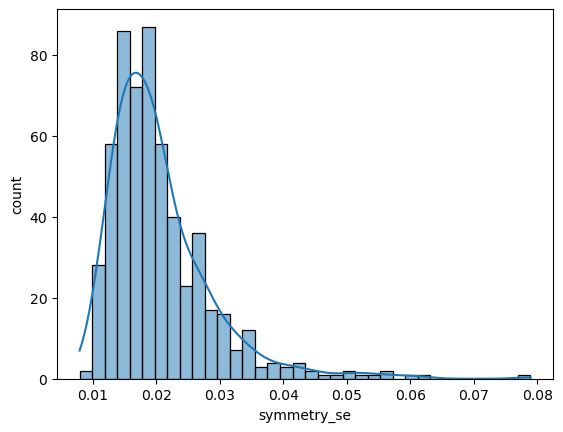

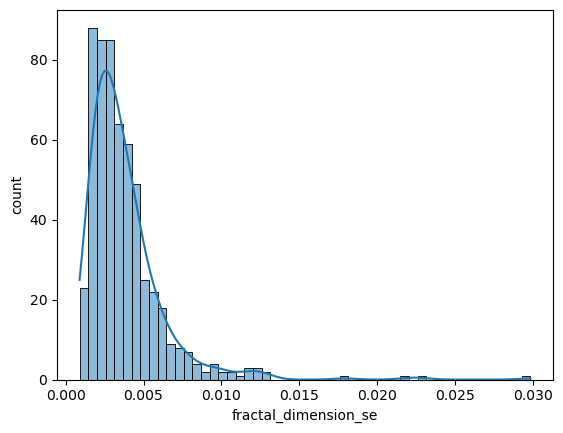

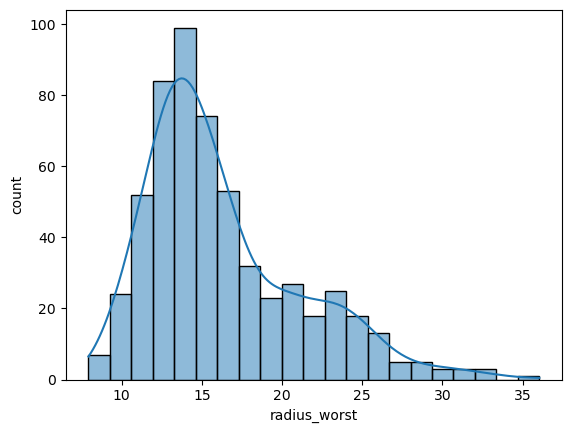

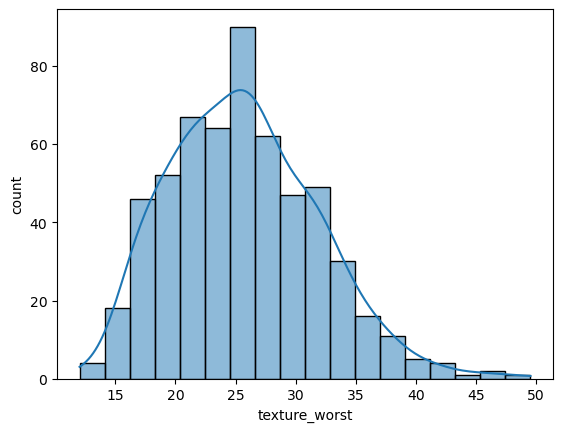

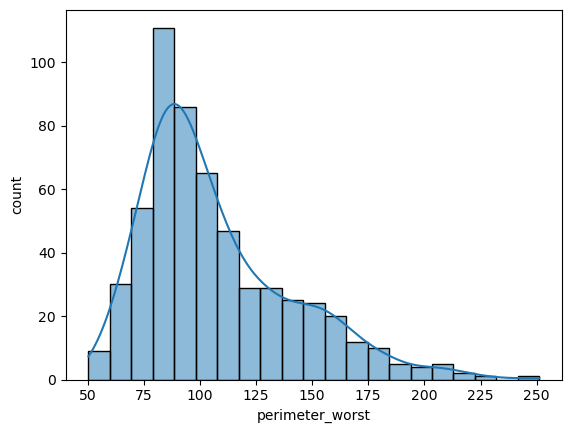

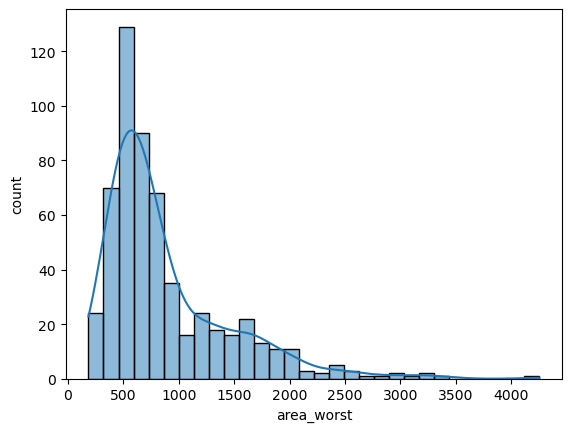

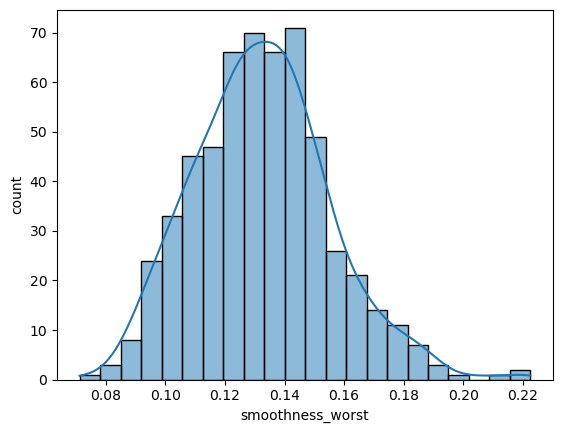

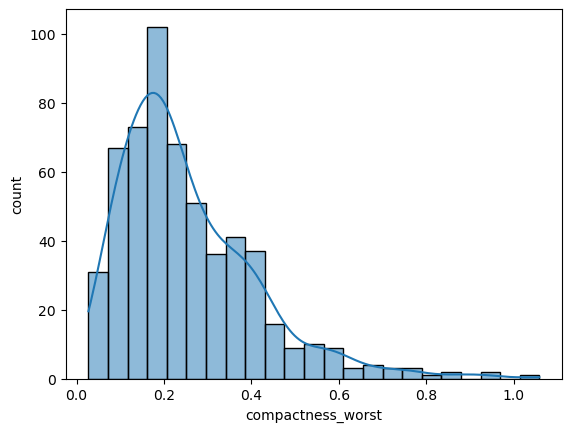

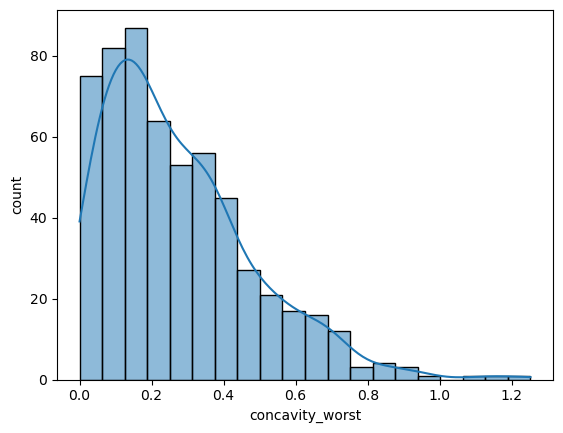

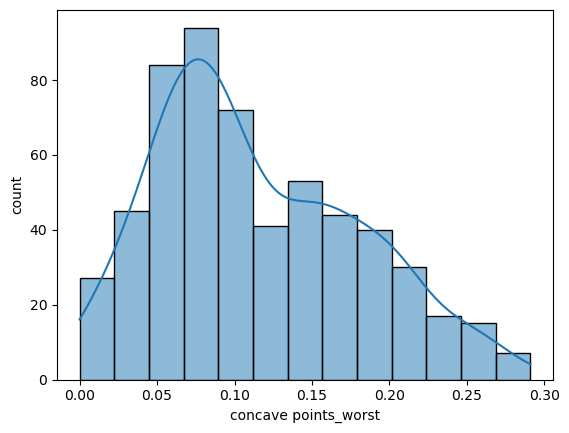

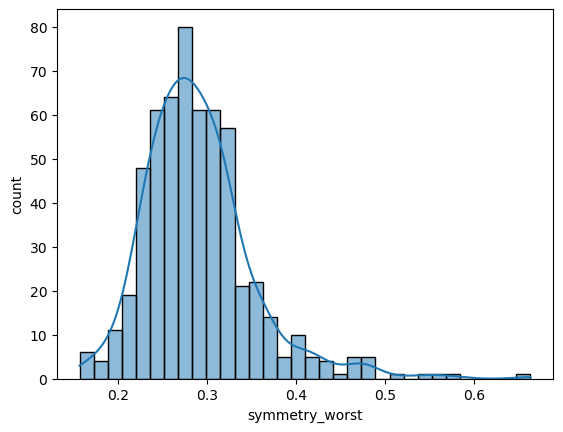

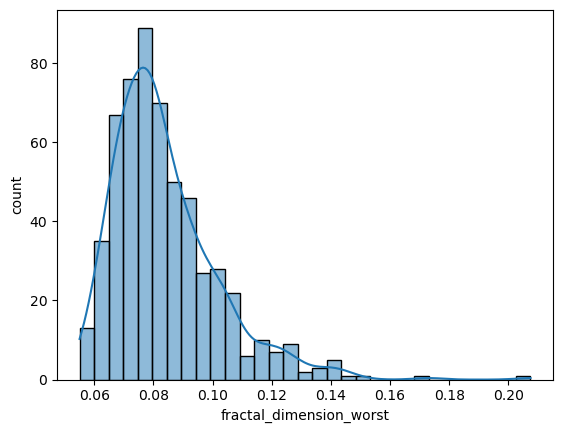

In [28]:
data = dataset.copy()
for feature in continuous_feature:
    sns.histplot(data[feature], kde = True)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

In [ ]:
plt.figure(figsize = (20,20))
sns.heatmap(dataset.corr(),annot = True , fmt = '0.2f', square = True)

In [ ]:
data = dataset.copy()

for feature in continuous_feature:
    plt.boxplot(data[feature])
    plt.xlabel(feature)
    plt.show()
        

In [ ]:
dataset.corr()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = dataset.drop(columns=['diagnosis'])
Y = dataset['diagnosis']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.25,random_state = 3)

In [ ]:
X_train.head()

In [ ]:
X_train.to_csv("Processed.csv")

In [ ]:
process_data = X_train
process_data.head()

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score

# Assuming X and Y are your feature and target variables
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, Y_train)
Y_pred_log_reg = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(Y_test, Y_pred_log_reg)
log_reg_f1 = f1_score(Y_test, Y_pred_log_reg)

print("Logistic Regression Accuracy:", log_reg_accuracy,"F1 Score",log_reg_f1)

# Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, Y_train)
Y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
svm_f1 = f1_score(Y_test, Y_pred_svm)
print("Support Vector Machine Accuracy:", svm_accuracy,"F1 Score", svm_f1)

# Decision Tree Classifier
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, Y_train)
Y_pred_dec_tree = dec_tree.predict(X_test)
dec_tree_accuracy = accuracy_score(Y_test, Y_pred_dec_tree)
dec_tree_f1 = f1_score(Y_test, Y_pred_dec_tree)
print("Decision Tree Classifier Accuracy:", dec_tree_accuracy,"F1 Score", dec_tree_f1)

# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
knn_f1 = f1_score(Y_test, Y_pred_knn)
print("K-Nearest Neighbors Classifier Accuracy:", knn_accuracy,"F1 Score", knn_f1)

### Both KNN and Logistic Regression have same accuracy but Logisctic Regression has High F1-Score

In [ ]:
input_data = (19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88, 186.80, 2398.0, 0.53720,19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88, 186.80, 2398.0, 0.53720)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = log_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

In [ ]:
import pickle

In [ ]:
pickle.dump(log_reg, open("D:\DS_March\Projects\Breast_cancer_model.pkl",'wb'))

In [ ]:
Loaded_model = pickle.load(open("D:\DS_March\Projects\Breast_cancer_model.pkl", 'rb'))

In [ ]:
input_data = (19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    186.80, 2398.0, 0.53720,
    19.81, 22.15, 130.00, 1260.0, 5.865, 112.40, 27.32, 30.88,
    186.80, 2398.0, 0.53720)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = Loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')